#Random Optical Matches
Generation of randomly distributed Herschel-Radio counterparts to test the propogation of False sounterparts in the matching of radio source positions with optical data positions from the COSMOS survey.

##Import Necessary packages

In [ ]:
#import modin.pandas as pd #a faster version of pandas that runs on multiple cores
import pandas as pd
import numpy as np
import scipy as sp
from astropy.table import Table #to read the .FITS file
from tqdm.notebook import tqdm  
import plotly.express as px
import plotly.graph_objects as go
import timeit
num=0
area=6228*5940

In [ ]:

#import modin.pandas as pd #a faster version of pandas that runs on multiple cores
import seaborn as sns
import scipy as sp
from astropy.table import Table #to read the .FITS file
from tqdm.notebook import tqdm  
import plotly.express as px
import plotly.graph_objects as go
import timeit
num=0
from google.colab import drive
import os

from sklearn.decomposition import PCA
from sklearn import preprocessing

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
#pd.set_option('use_inf_as_na', True)
pd.set_option('display.max_columns', None, 'max_colwidth', None, 'display.expand_frame_repr', False,'display.max_rows', None) # print all columns in full, prevent line break # print all columns in full, prevent line break

##Herschel-Radio data matched with COSMOS optical data
Cosmos dataset matched with Herschel Submm sources with VLA Radio counterparts positions. The sources have an s value less than the 95% purity threshold of 0.166.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# HOR (Herschel Optical Radio Counterparts)
from astropy.table import Table #to read the .FITS file

herschel = Table.read(f'/content/drive/MyDrive/Herschel/Optical_Herschel_Radio_s_statistic_purity.fits', format='fits').to_pandas()
herschel.drop('col1',axis=1,inplace=True) #remove null columns
herschel = herschel.rename(columns={'F_BLIND_MF_SPIRE_250': 'H_250_flux','F_BLIND_MF_SPIRE_350': 'H_350_flux','F_BLIND_MF_SPIRE_500': 'H_500_flux','flux_match':'Radio_flux'})
herschel[100:102]

,Herschel_RA,Herschel_Dec,H_250_flux,FErr_BLIND_MF_SPIRE_250,H_350_flux,FErr_BLIND_MF_SPIRE_350,H_500_flux,FErr_BLIND_MF_SPIRE_500,r,P,RA_pix,Dec_pix,F_BLIND_pix_SPIRE_250,FErr_BLIND_pix_SPIRE_250,ID_match,Project_match,Time_match,RA,RA_ERR_match,DEC,DEC_ERR_match,Radio_flux,flux_err_match,RMS_match,SNR_match,NPIX_match,RES_match,Multi_match,GroupID_1,GroupSize_1,Separation_1,s,s_norm,Id,alpha,delta,zBEST,type,zPDF,zPDF_l68,zPDF_u68,zMinChi2,chi2_best,zp_2,chi2_2,NbFilt,zq,chiq,modq,mods,chis,maskUVISTA,maskHSC,maskSCAM,mask,model,age,extinction,MFUV,MNUV,MU,MG,MR,MI,MZ,MY,MJ,MH,MK,mass_med,mass_med_min68,mass_med_max68,mass_best,SFR_med,SFR_med_min68,SFR_med_max68,SFR_best,sSFR_med,sSFR_med_min68,sSFR_med_max68,sSFR_best,L_nu,L_r,L_k,GroupID,GroupSize,Separation
100,150.189544,2.037343,0.038306,0.002481,0.033220,0.002513,0.012584,0.002528,0.877197,0.986874,150.190100,2.036787,0.035046,0.002415,2505.0,"b""b'COSMOSVLA3'""","b""b'J100045.47+020213.1'""",150.189490,0.039,2.036991,0.039,44.700001,3.3,2.36,14.2,39.0,1.0,0.0,<NA>,<NA>,1.281848,0.000389,0.004608,643843.0,150.189453,2.03698,1.0345,0.0,1.0345,1.0199,1.1869,1.18530,4.894367,-99.900002,33333334.0,33.0,1.78,3.641600,10013.0,-196.0,23.288742,0.0,0.0,0.0,0.0,9.0,3.000000e+09,0.6,-16.606199,-17.561630,-19.70360,-21.128950,-22.001341,-22.506870,-22.921471,-23.30426,-23.60890,-24.06296,-24.216040,11.01875,10.96461,11.07167,11.05808,1.85483,1.59634,1.95368,1.559,-9.14714,-9.50747,-9.04155,-9.499,10.498,10.613,9.835,<NA>,<NA>,0.138539
101,150.310684,1.672906,0.015439,0.002511,0.006187,0.002521,0.001212,0.002513,0.544931,0.974400,150.310128,1.673462,0.021398,0.002443,2194.0,"b""b'COSMOSVLA3'""","b""b'J100114.42+014025.4'""",150.310117,0.035,1.673725,0.035,58.099998,3.7,2.29,15.9,52.0,1.0,0.0,<NA>,<NA>,3.583465,0.002235,0.026484,273761.0,150.310135,1.67373,0.5648,0.0,0.5648,0.5552,0.5738,0.56531,1.581755,-99.900002,32258064.0,34.0,0.46,2.202761,10007.0,-380.0,74.907814,0.0,0.0,0.0,0.0,11.0,1.800000e+09,0.4,-20.186359,-20.267811,-21.56933,-22.500179,-23.021351,-23.209539,-23.542311,-23.73020,-23.89653,-24.06851,-23.905581,10.83141,10.79166,10.87560,10.84282,1.80021,1.73207,1.86835,1.784,-9.06153,-9.14806,-8.98273,-9.059,10.675,10.566,9.772,<NA>,<NA>,0.066853


In [ ]:
herschel.describe()

,Herschel_RA,Herschel_Dec,H_250_flux,FErr_BLIND_MF_SPIRE_250,H_350_flux,FErr_BLIND_MF_SPIRE_350,H_500_flux,FErr_BLIND_MF_SPIRE_500,r,P,RA_pix,Dec_pix,F_BLIND_pix_SPIRE_250,FErr_BLIND_pix_SPIRE_250,ID_match,RA,RA_ERR_match,DEC,DEC_ERR_match,Radio_flux,flux_err_match,RMS_match,SNR_match,NPIX_match,RES_match,Multi_match,GroupID_1,GroupSize_1,Separation_1,s,s_norm,Id,alpha,delta,zBEST,type,zPDF,zPDF_l68,zPDF_u68,zMinChi2,chi2_best,zp_2,chi2_2,NbFilt,zq,chiq,modq,mods,chis,maskUVISTA,maskHSC,maskSCAM,mask,model,age,extinction,MFUV,MNUV,MU,MG,MR,MI,MZ,MY,MJ,MH,MK,mass_med,mass_med_min68,mass_med_max68,mass_best,SFR_med,SFR_med_min68,SFR_med_max68,SFR_best,sSFR_med,sSFR_med_min68,sSFR_med_max68,sSFR_best,L_nu,L_r,L_k,GroupID,GroupSize,Separation
count,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,1002.000000,1002.000000,3695.000000,3.695000e+03,3695.000000,3.373000e+03,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3.373000e+03,3373.000000,3.373000e+03,3373.000000,3373.000000,3.373000e+03,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3.373000e+03,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.0000,3373.000000,3373.000000,3373.000000,3373.000,3373.000000,3373.000000,3373.000000,48.000000,48.0,3373.000000
mean,150.136423,2.249582,0.027638,0.002559,0.021452,0.002548,0.012032,0.002571,0.749973,0.963333,150.136432,2.249629,0.026876,0.002490,4348.445312,150.136404,0.093120,2.249547,0.093120,83.066803,4.269713,2.533901,19.092354,43.688499,0.553451,0.003789,366.432136,2.220559,2.674285,3.122097e-03,0.036993,8.721591e+05,150.132919,2.247018,-17.089273,0.238660,-15.078515,-17.201252,-13.843505,1.210349,5.665240e+00,-89.107956,3.087547e+07,31.967981,1.175896,5.966952e+00,10008.645508,-261.889404,34.810074,0.147050,0.170768,0.108509,0.335903,-8.516750,2.791181e+09,-15.860784,-34.017761,-34.820930,-36.569611,-37.613174,-38.274857,-38.588123,-38.888962,-39.136135,-39.360641,-39.672493,-39.583622,-9.882935,-9.947045,-9.822112,-5.704781,-19.155043,-24.311193,-18.405201,-inf,-28.522583,-33.653549,-27.748638,-inf,-6.164944,-6.065414,-6.840628,12.500000,2.0,0.177739
std,0.384320,0.394309,0.017189,0.000193,0.012678,0.000187,0.009934,0.000190,0.137716,0.033249,0.384292,0.394302,0.015790,0.000189,2733.524170,0.384280,0.611573,0.394300,0.611573,817.294800,15.105197,0.523130,57.125725,179.056442,0.497205,0.061445,211.583866,0.549504,1.645726,3.479616e-03,0.041231,4.167519e+05,0.383059,0.396912,60.340492,0.692037,126.699760,134.372223,122.085953,0.807426,3.699502e+01,31.430859,1.125581e+07,3.294937,0.881477,3.972411e+01,6.652100,117.678391,29.434704,0.354213,0.376366,0.311073,0.472381,127.569939,2.185850e+09,126.597015,124.276367,124.169235,123.936630,123.801216,123.715813,123.675247,123.636345,123.604568,123.575485,123.535248,123.546600,142.961243,142.951981,142.970154,127.906059,141.627945,157.687012,139.623657,NaN,136.064697,152.407547,134.020294,NaN,127.848602,127.859749,127.759743,6.995439,0.0,0.171465
min,149.430966,1.512012,0.007566,0.002442,-0.003848,0.002418,-0.007479,0.002417,0.030637,0.850335,149.430966,1.511734,0.013501,0.002379,3.000000,149.430594,0.010000,1.512421,0.010000,11.100000,-99.000000,2.070000,-99.000000,8.000000,0.000000,0.000000,1.000000,2.000000,0.041368,1.690053e-07,0.000000,1.125430e+05,149.430573,1.512480,-99.000000,-9.000000,-999.000000,-999.000000,-999.000000,0.000000,1.259060e-10,-99.900002,1.179950e-08,1.000000,0.000000,5.958920e-12,10001.000000,-664.000000,0.000005,0.000000,0.000000,0

In [ ]:
herschel['Herschel_RA'].min()

149.43096582047346

In [ ]:
herschel['Id'].count()

3373

##Create Random Data
Creating randomly distributed Herschel sources to match the predicted level of False counterparts to analyse the percentage of False counterparts that find optical counterparts if the distribution is at random.

In [ ]:
sample_size=int(600)
df_mc4 = pd.DataFrame({'RA':np.random.uniform( low = herschel['Herschel_RA'].min(), high = herschel['Herschel_RA'].max(), size=sample_size),
                       'Dec':np.random.uniform( low = herschel['Herschel_Dec'].min(), high = herschel['Herschel_Dec'].max(),size=sample_size),
                       'Id':np.random.choice(herschel['Id'],size=sample_size)})
                       
df_mc4['Id'] = df_mc4['Id'].fillna( int( df_mc4['Id'].mean() ))
df_mc4.to_csv(f'Random_radio_herschel_counterparts_10.csv')

##Display distribution of random data
Display distribution of randomly distributed False radio counterparts to the Herschel sources

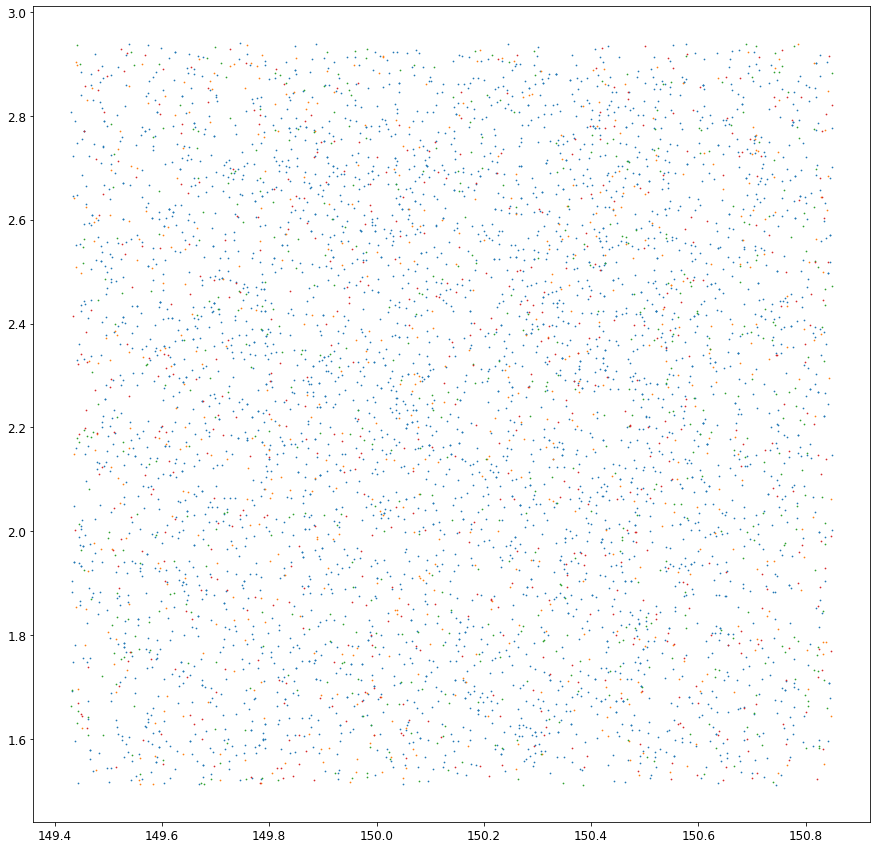

In [ ]:
plt.figure(figsize=(15,15))
plt.scatter(herschel['Herschel_RA'],herschel['Herschel_Dec'],s=0.5)
plt.scatter(df_mc1['RA'],df_mc1['Dec'],s=0.5)
plt.scatter(df_mc2['RA'],df_mc2['Dec'],s=0.5)
plt.scatter(df_mc3['RA'],df_mc3['Dec'],s=0.5)

In [ ]:
df_mc1.count() #Number of random sources generated, ensure no missing values

RA     600
Dec    600
Id     600
dtype: int64

In [ ]:
# set up plotly figure
fig = go.Figure()

# add line / trace 2 to figure
fig.add_trace(go.Scatter(
    x = df_mc1['RA'],
    y = df_mc1['Dec'],
    hovertext=['random_2'],
    hoverinfo="text",
    mode='markers',
    marker=dict(
        color="grey",
        size = 3        
    ),
    showlegend=False
))

# add line / trace 1 to figure
fig.add_trace(go.Scatter(
    x = df_mc2['RA'],
    y = df_mc2['Dec'],
    hovertext=['random_2'],
    hoverinfo="text",
    mode='markers',
    marker=dict(
        color="blue",
        size = 3
    ),
    showlegend=False
))

# add line / trace 2 to figure
fig.add_trace(go.Scatter(
    x = df_mc3['RA'],
    y = df_mc3['Dec'],
    hovertext=['random_2'],
    hoverinfo="text",
    mode='markers',
    marker=dict(
        color="green",
        size = 3        
    ),
    showlegend=False
))

# add line / trace 2 to figure
fig.add_trace(go.Scatter(
    x = df_mc4['RA'],
    y = df_mc4['Dec'],
    hovertext=['random_2'],
    hoverinfo="text",
    mode='markers',
    marker=dict(
        color="red",
        size = 3        
    ),
    showlegend=False
))

# add line / trace 2 to figure
fig.add_trace(go.Scatter(
    x = df_mc5['RA'],
    y = df_mc5['Dec'],
    hovertext=['random_2'],
    hoverinfo="text",
    mode='markers',
    marker=dict(
        color="yellow",
        size = 3        
    ),
    showlegend=False
))


fig.show()

In [ ]:
df_mc2.count()

RA     600
Dec    600
Id     600
dtype: int64

In [ ]:
np.random.uniform(low=0,high=100)

15.650506399591768

In [ ]:
full_distribution = [448,448,440,441,425,424,474,458,474,458,478,420,456,391,427,487,419,428,472,444,442,476,463]
np.median(full_distribution)

448.0

In [ ]:
random_pair = [82,89,77,70,77,96,71,76,83,79]
np.median(random_pair)

78.0

In [ ]:
px.histogram(df_mc1,'Dec', nbins=100) #randomly sampled positions